In [23]:
import pickle
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
def load(path):
    obj= pickle.load(open(path,'rb'))
    return obj

In [24]:
history=load("artefacts/history.pickle")

In [25]:
def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']

    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    

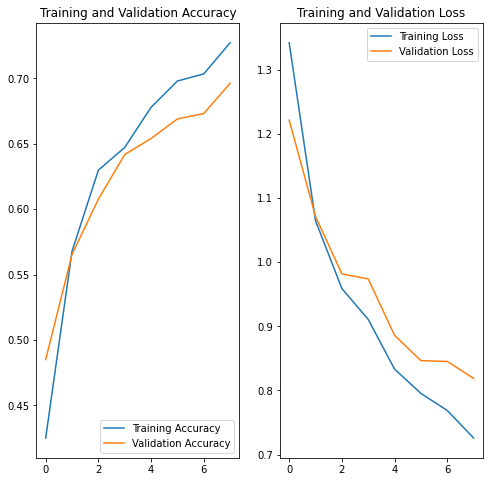

In [26]:
plot_history(history)

In [6]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"

In [27]:
model=tf.keras.models.load_model("artefacts/model.h5")

In [28]:
def predict(model, path):
    
    # download image to local disk
    local_path = tf.keras.utils.get_file('Red_sunflower', origin=path)
    
    img = tf.keras.utils.load_img(
        local_path, target_size=(180, 180)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    class_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    return predictions

In [29]:
predict(model, sunflower_url)

This image most likely belongs to sunflowers with a 70.56 percent confidence.


array([[-2.6272058, -3.3562746,  3.0504797,  6.7028785,  5.7642627]],
      dtype=float32)